Project-1

Maintainer's Name: 
1. Minie Jung
2. Kunaphas Kongkitimanon
3. Chang Wan-Ju

Machine leraning method
* Multinomial Logistic Regression
* Support Vector Machines
* K-Nearest Neighbor
* Decision Trees
* Random Forest


In [0]:
# import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import sklearn
from sklearn.model_selection import KFold, cross_val_score

## Data preprocessing 
Load data

In [0]:
col_names=["age","sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]

df = pd.read_csv("processed.cleveland.data",header=None, names=col_names, na_values="?")
#df = pd.read_csv("processed.merged.data", na_values="?")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null float64
sex         303 non-null float64
cp          303 non-null float64
trestbps    303 non-null float64
chol        303 non-null float64
fbs         303 non-null float64
restecg     303 non-null float64
thalach     303 non-null float64
exang       303 non-null float64
oldpeak     303 non-null float64
slope       303 non-null float64
ca          299 non-null float64
thal        301 non-null float64
target      303 non-null int64
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


Visualize all data

In [0]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


### Taking care of missing data


Identify missing value in a dataset

,Total,Percent
ca,4,1.320132
thal,2,0.660066
target,0,0.000000
slope,0,0.000000
oldpeak,0,0.000000
exang,0,0.000000
thalach,0,0.000000
restecg,0,0.000000
fbs,0,0.000000
chol,0,0.000000


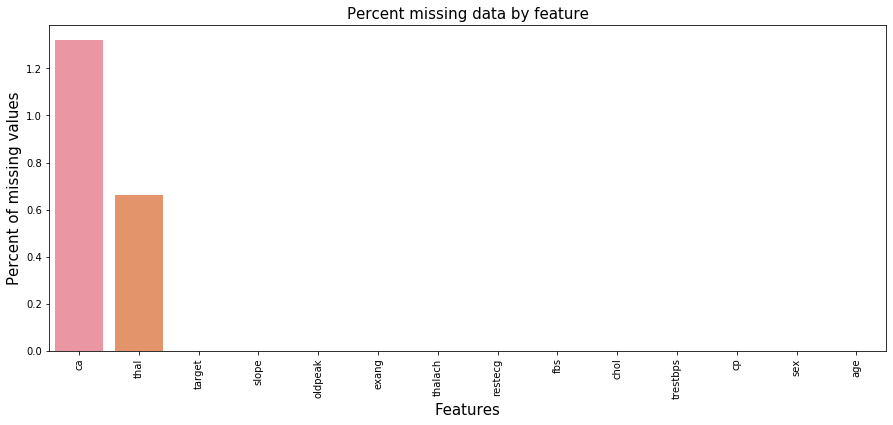

In [0]:
total = df.isnull().sum().sort_values(ascending=False)
percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data

Univariate feature imputation

In [0]:
#change thal value

for i in range(0,len(df)) :
  value = df["thal"][i]
  if value == 3 :
    df["thal"][i] = 0
  elif value == 6 :
    df["thal"][i] = 1
  elif value == 7 : 
    df["thal"][i] = 2
  else : 
    df["thal"][i] = value

In [0]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer , SimpleImputer

# take care oldpeak 
df_oldpeak =pd.DataFrame(data=df["oldpeak"].to_numpy(),columns=["oldpeak"])   
imp = SimpleImputer(strategy  ="mean")
imp.fit(df_oldpeak.to_numpy())  
_oldpeak = np.around(imp.transform(df_oldpeak.to_numpy() ), decimals=1) # round to the given number of decimals.

# take care thal
df_thal =pd.DataFrame(data=df["thal"].to_numpy(),columns=["thal"])   
imp = SimpleImputer(strategy  ="median")
imp.fit(df_thal.to_numpy())  
_thal = np.round(imp.transform(df_thal.to_numpy() ))

# All remaing columns
imp = SimpleImputer(strategy  ="mean")
imp.fit(df.to_numpy())
np_imputed =  np.round(imp.transform(df.to_numpy()))

# Comvert NP array to data frame
df =  pd.DataFrame(data=np_imputed[:,:],columns=col_names)  
df["oldpeak"] = _oldpeak
df["thal"] = _thal

for col in df:
    print(col , df[col].unique())

age [63. 67. 37. 41. 56. 62. 57. 53. 44. 52. 48. 54. 49. 64. 58. 60. 50. 66.
 43. 40. 69. 59. 42. 55. 61. 65. 71. 51. 46. 45. 39. 68. 47. 34. 35. 29.
 70. 77. 38. 74. 76.]
sex [1. 0.]
cp [1. 4. 3. 2.]
trestbps [145. 160. 120. 130. 140. 172. 150. 110. 132. 117. 135. 112. 105. 124.
 125. 142. 128. 170. 155. 104. 180. 138. 108. 134. 122. 115. 118. 100.
 200.  94. 165. 102. 152. 101. 126. 174. 148. 178. 158. 192. 129. 144.
 123. 136. 146. 106. 156. 154. 114. 164.]
chol [233. 286. 229. 250. 204. 236. 268. 354. 254. 203. 192. 294. 256. 263.
 199. 168. 239. 275. 266. 211. 283. 284. 224. 206. 219. 340. 226. 247.
 167. 230. 335. 234. 177. 276. 353. 243. 225. 302. 212. 330. 175. 417.
 197. 198. 290. 253. 172. 273. 213. 305. 216. 304. 188. 282. 185. 232.
 326. 231. 269. 267. 248. 360. 258. 308. 245. 270. 208. 264. 321. 274.
 325. 235. 257. 164. 141. 252. 255. 201. 222. 260. 182. 303. 265. 309.
 307. 249. 186. 341. 183. 407. 217. 288. 220. 209. 227. 261. 174. 281.
 221. 205. 240. 289. 318. 298. 56

Check the 'NaN' value whether it's still exist or not

In [0]:
# Summary
# look at the actual data though, to confirm
df[df.isna().any(axis=1)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


### OneHotEndocer

In [0]:
need_encode_col = ["restecg", "thal", "slope", "cp"]
df[need_encode_col] = df[need_encode_col].astype('int')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1,145.0,233.0,1.0,2,150.0,0.0,2.3,3,0.0,1,0.0
1,67.0,1.0,4,160.0,286.0,0.0,2,108.0,1.0,1.5,2,3.0,0,2.0
2,67.0,1.0,4,120.0,229.0,0.0,2,129.0,1.0,2.6,2,2.0,2,1.0
3,37.0,1.0,3,130.0,250.0,0.0,0,187.0,0.0,3.5,3,0.0,0,0.0
4,41.0,0.0,2,130.0,204.0,0.0,2,172.0,0.0,1.4,1,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1,110.0,264.0,0.0,0,132.0,0.0,1.2,2,0.0,2,1.0
299,68.0,1.0,4,144.0,193.0,1.0,0,141.0,0.0,3.4,2,2.0,2,2.0
300,57.0,1.0,4,130.0,131.0,0.0,0,115.0,1.0,1.2,2,1.0,2,3.0
301,57.0,0.0,2,130.0,236.0,0.0,2,174.0,0.0,0.0,2,1.0,0,1.0


In [0]:
def onehot(ser, num_classes=None):
    
    if num_classes == None:
        num_classes = len(np.unique(ser))
    return np.identity(num_classes)[ser]

new_col_names = []
need_encode_col = ["restecg", "thal", "slope", "cp"] 
no_encode_col = [col for col in df.columns if col not in need_encode_col]
df_new = df[need_encode_col]
new_df = df[no_encode_col]

for col in need_encode_col:
    #print(df[col])
    if col == "cp":
        df_new[col] = df_new[col]-1
    elif col == "slope":
        df_new[col] = df_new[col]-1
               
    num_classes = len(df[col].unique())
    new_col_names = [f"{col}_{i}" for i in range(num_classes)]
    encoded = pd.DataFrame(onehot(df_new[col], num_classes), columns=new_col_names, dtype=int)
    new_df = pd.concat([new_df, encoded], axis=1)
    
new_df.head()


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,restecg_0,restecg_1,restecg_2,thal_0,thal_1,thal_2,slope_0,slope_1,slope_2,cp_0,cp_1,cp_2,cp_3
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,0.0,0,0,1,0,1,0,0,0,1,1,0,0,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,2.0,0,0,1,1,0,0,0,1,0,0,0,0,1
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,1.0,0,0,1,0,0,1,0,1,0,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0.0,1,0,0,1,0,0,0,0,1,0,0,1,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0.0,0,0,1,1,0,0,1,0,0,0,1,0,0


###Detect and Remove Outliers

In [0]:
#detect outliers_Elliptic envelope
from sklearn.covariance import EllipticEnvelope
clf = EllipticEnvelope(contamination=.1,random_state=0)
clf.fit(new_df)
ee_scores = pd.Series(clf.decision_function(new_df)) 
ee_predict = clf.predict(new_df)

ee_predict #value -1 means it is outlier

array([-1,  1,  1, -1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [0]:
#remove outliers
ee_df = new_df[ee_predict==1]
ee_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 272 entries, 1 to 302
Data columns (total 23 columns):
age          272 non-null float64
sex          272 non-null float64
trestbps     272 non-null float64
chol         272 non-null float64
fbs          272 non-null float64
thalach      272 non-null float64
exang        272 non-null float64
oldpeak      272 non-null float64
ca           272 non-null float64
target       272 non-null float64
restecg_0    272 non-null int64
restecg_1    272 non-null int64
restecg_2    272 non-null int64
thal_0       272 non-null int64
thal_1       272 non-null int64
thal_2       272 non-null int64
slope_0      272 non-null int64
slope_1      272 non-null int64
slope_2      272 non-null int64
cp_0         272 non-null int64
cp_1         272 non-null int64
cp_2         272 non-null int64
cp_3         272 non-null int64
dtypes: float64(10), int64(13)
memory usage: 51.0 KB




### Normalization 


In [0]:
import copy

norm_col = ["age", "trestbps", "chol", "thalach", "oldpeak"]
norm_df = copy.copy(ee_df)

for col in norm_col:
    norm_df[col] = (norm_df[col] - norm_df[col].mean()) / (norm_df[col].max() - norm_df[col].min())
    
norm_df

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,restecg_0,restecg_1,restecg_2,thal_0,thal_1,thal_2,slope_0,slope_1,slope_2,cp_0,cp_1,cp_2,cp_3
1,0.286356,1.0,0.299632,0.137786,0.0,-0.322659,1.0,0.147496,3.0,2.0,0,0,1,1,0,0,0,1,0,0,0,0,1
2,0.286356,1.0,-0.108531,-0.058091,0.0,-0.162354,1.0,0.409401,2.0,1.0,0,0,1,0,0,1,0,1,0,0,0,0,1
4,-0.291422,0.0,-0.006490,-0.144001,0.0,0.165890,0.0,0.123687,0.0,0.0,0,0,1,1,0,0,1,0,0,0,1,0,0
5,0.041912,1.0,-0.108531,-0.034036,0.0,0.211692,0.0,-0.019170,0.0,0.0,1,0,0,1,0,0,1,0,0,0,1,0,0
7,0.064134,0.0,-0.108531,0.371463,0.0,0.097188,1.0,-0.066789,0.0,0.0,1,0,0,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,-0.202533,1.0,-0.210572,0.062184,0.0,-0.139453,0.0,0.076068,0.0,1.0,1,0,0,0,0,1,0,1,0,1,0,0,0
299,0.308578,1.0,0.136367,-0.181802,1.0,-0.070751,0.0,0.599877,2.0,2.0,1,0,0,0,0,1,0,1,0,0,0,0,1
300,0.064134,1.0,-0.006490,-0.394861,0.0,-0.269224,1.0,0.076068,1.0,3.0,1,0,0,0,0,1,0,1,0,0,0,0,1
301,0.064134,0.0,-0.006490,-0.034036,0.0,0.181157,0.0,-0.209646,1.0,1.0,0,0,1,1,0,0,0,1,0,0,1,0,0


### Splitting the dataset

Split the dataset into  dependent variable and independent variables set



In [0]:
#for model without normalization

X = ee_df.loc[:, new_df.columns != 'target'] # Features
y = ee_df[ ["target"]] #  Label

print(X)
print(y)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

      age  sex  trestbps   chol  fbs  ...  slope_2  cp_0  cp_1  cp_2  cp_3
1    67.0  1.0     160.0  286.0  0.0  ...        0     0     0     0     1
2    67.0  1.0     120.0  229.0  0.0  ...        0     0     0     0     1
4    41.0  0.0     130.0  204.0  0.0  ...        0     0     1     0     0
5    56.0  1.0     120.0  236.0  0.0  ...        0     0     1     0     0
7    57.0  0.0     120.0  354.0  0.0  ...        0     0     0     0     1
..    ...  ...       ...    ...  ...  ...      ...   ...   ...   ...   ...
298  45.0  1.0     110.0  264.0  0.0  ...        0     1     0     0     0
299  68.0  1.0     144.0  193.0  1.0  ...        0     0     0     0     1
300  57.0  1.0     130.0  131.0  0.0  ...        0     0     0     0     1
301  57.0  0.0     130.0  236.0  0.0  ...        0     0     1     0     0
302  38.0  1.0     138.0  175.0  0.0  ...        0     0     0     1     0

[272 rows x 22 columns]
     target
1       2.0
2       1.0
4       0.0
5       0.0
7       0.0
.. 

In [0]:
#for model with normalization

X = norm_df.loc[:, new_df.columns != 'target'] # Features
y = norm_df[ ["target"]] #  Label

print(X)
print(y)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

          age  sex  trestbps      chol  fbs  ...  slope_2  cp_0  cp_1  cp_2  cp_3
1    0.286356  1.0  0.299632  0.137786  0.0  ...        0     0     0     0     1
2    0.286356  1.0 -0.108531 -0.058091  0.0  ...        0     0     0     0     1
4   -0.291422  0.0 -0.006490 -0.144001  0.0  ...        0     0     1     0     0
5    0.041912  1.0 -0.108531 -0.034036  0.0  ...        0     0     1     0     0
7    0.064134  0.0 -0.108531  0.371463  0.0  ...        0     0     0     0     1
..        ...  ...       ...       ...  ...  ...      ...   ...   ...   ...   ...
298 -0.202533  1.0 -0.210572  0.062184  0.0  ...        0     1     0     0     0
299  0.308578  1.0  0.136367 -0.181802  1.0  ...        0     0     0     0     1
300  0.064134  1.0 -0.006490 -0.394861  0.0  ...        0     0     0     0     1
301  0.064134  0.0 -0.006490 -0.034036  0.0  ...        0     0     1     0     0
302 -0.358088  1.0  0.075143 -0.243658  0.0  ...        0     0     0     1     0

[272 rows x 22 

## Build Model 

### Multinomial Logistic Regression

In [0]:
# Fitting Logistic RegressioLogistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier_logis = LogisticRegression(random_state = 0,multi_class='multinomial', solver='newton-cg')
classifier_logis

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

### SVM (Support vector machines )

In [0]:
# Create your classifier here
from sklearn.svm import SVC
classifier_svm = SVC(kernel  = "rbf", random_state = 0 )
classifier_svm

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

### KNN

In [0]:
from sklearn.neighbors import KNeighborsClassifier
clf_neigh = KNeighborsClassifier(n_neighbors=3)
clf_neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

###Decision Tree

In [0]:
from sklearn import tree
clf_decision_tree = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 4, random_state = 0)
clf_decision_tree
  #criterion method = 'entropy'/'gini'
  #restrict the depth of tree: prevent overfitting

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

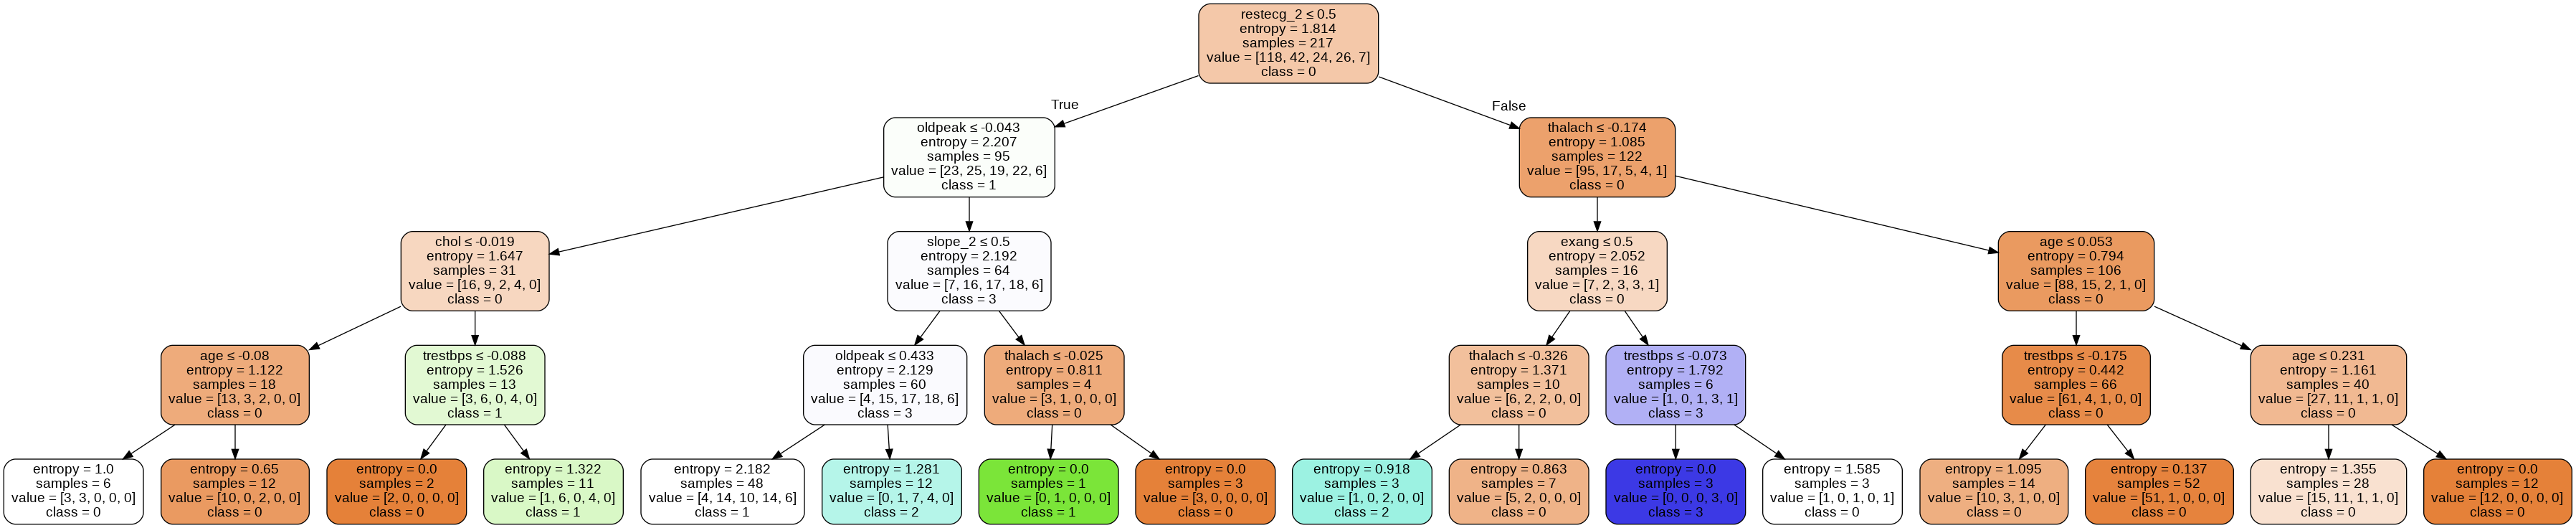

In [0]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

clf_decision_tree = clf_decision_tree.fit(X_train, y_train)
column_name = new_df.columns[0:22]

dot_data = StringIO()
export_graphviz(clf_decision_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = column_name, class_names=['0','1','2','3','4'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

###Random Forest Algorithms

In [0]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf_random_forest=RandomForestClassifier(random_state = 0)
clf_random_forest

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

visual decision tree

## Evaluation




####K-Fold

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score , KFold
kf = KFold(n_splits=10, shuffle=True)
#cm = pd.DataFrame(confusion_matrix(y_test, y_pred), columns=["T", "F"], index=["P", "N"])
#print("Accuracy = %.2f%%" % ((cm.iloc[1, 1] + cm.iloc[0, 0]) / cm.values.sum() * 100))
#confusion_matrix(y_test, y_pred)
#accuracy_score(y_test, y_pred_logis)

def print_accuracy_report(classifier, X, y, num_validations=5):
    
    accuracy = cross_val_score(classifier, 
            X, y, scoring='accuracy', cv=num_validations)
    print("Accuracy: %0.2f (+/- %0.2f)" % (accuracy.mean(), accuracy.std()*2 ))

    f1 = cross_val_score(classifier, 
            X, y, scoring='f1_weighted', cv=num_validations)
    print ("F1: : %0.2f (+/- %0.2f)" %  (f1.mean(),f1.std()*2) )
    
    precision = cross_val_score(classifier, 
            X, y, scoring='precision_weighted', cv=num_validations)
    print ("Precision: : %0.2f (+/- %0.2f)" %  (precision.mean(),precision.std()*2) )

    recall = cross_val_score(classifier, 
            X, y, scoring='recall_weighted', cv=num_validations)
    print ("Recall: : %0.2f (+/- %0.2f)" %  (recall.mean(),recall.std()*2) )

Multinomial Logistic Regression

In [0]:
print_accuracy_report(classifier_logis, X, y, num_validations=kf )

Accuracy: 0.60 (+/- 0.15)
F1: : 0.57 (+/- 0.15)
Precision: : 0.56 (+/- 0.24)
Recall: : 0.58 (+/- 0.22)


SVM 

In [0]:
print_accuracy_report(classifier_svm, X, y, num_validations=kf )

Accuracy: 0.60 (+/- 0.16)
F1: : 0.53 (+/- 0.14)
Precision: : 0.50 (+/- 0.18)
Recall: : 0.62 (+/- 0.12)


KNN

In [0]:
print_accuracy_report(clf_neigh, X, y, num_validations=kf )

Accuracy: 0.59 (+/- 0.15)
F1: : 0.57 (+/- 0.23)
Precision: : 0.56 (+/- 0.18)
Recall: : 0.58 (+/- 0.09)


Decision Tree

In [0]:
print_accuracy_report(clf_decision_tree, X, y, num_validations=kf )

Accuracy: 0.55 (+/- 0.17)
F1: : 0.51 (+/- 0.26)
Precision: : 0.54 (+/- 0.20)
Recall: : 0.58 (+/- 0.21)


Random Forest 

In [0]:
print_accuracy_report(clf_random_forest, X, y, num_validations=kf )

Accuracy: 0.58 (+/- 0.16)
F1: : 0.54 (+/- 0.17)
Precision: : 0.53 (+/- 0.23)
Recall: : 0.57 (+/- 0.19)


####Without K-Flod

Multinomial Rogistic Regression

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

clf = LogisticRegression(random_state = 0)
clf.fit(X_train, y_train)

# Predicting the Test set results
y_pred = clf.predict(X_test)



cm = pd.DataFrame(confusion_matrix(y_test, y_pred), columns=["0", "1", "2", "3", "4"], index=["0", "1", "2", "3", "4"])

print("Rogistic Regression Accuracy : %0.2f" % accuracy_score(y_test, y_pred))
print()
cm

Rogistic Regression Accuracy : 0.67



,0,1,2,3,4
0,34,1,0,0,0
1,6,3,1,1,0
2,4,1,0,1,0
3,0,1,1,0,0
4,0,1,0,0,0


SVM (Support Vector Machines)

In [0]:
from sklearn.svm import SVC
clf_svm = SVC(kernel  = "rbf", random_state = 0 )
clf_svm.fit(X_train, y_train)

y_pred = clf_svm.predict(X_test)

cm = pd.DataFrame(confusion_matrix(y_test, y_pred), columns=["0", "1", "2", "3", "4"], index=["0", "1", "2", "3", "4"])

print("SVM Accuracy : %0.2f" % accuracy_score(y_test, y_pred))
print()
cm

SVM Accuracy : 0.65



,0,1,2,3,4
0,35,0,0,0,0
1,9,0,0,2,0
2,5,0,0,1,0
3,0,1,0,1,0
4,0,1,0,0,0


KNN

In [0]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors=3) #set k value 3
clf_knn.fit(X_train, y_train)

y_pred = clf_knn.predict(X_test)

cm = pd.DataFrame(confusion_matrix(y_test, y_pred), columns=["0", "1", "2", "3", "4"], index=["0", "1", "2", "3", "4"])

print("KNN Accuracy : %0.2f" % accuracy_score(y_test, y_pred))
print()
cm

KNN Accuracy : 0.69



,0,1,2,3,4
0,32,3,0,0,0
1,4,5,0,2,0
2,3,2,1,0,0
3,0,2,0,0,0
4,0,1,0,0,0


Decision Tree

In [0]:
from sklearn import tree
clf_dt = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 4, random_state = 0)
clf_dt.fit(X_train, y_train)

y_pred = clf_dt.predict(X_test)

cm = pd.DataFrame(confusion_matrix(y_test, y_pred), columns=["0", "1", "2", "3", "4"], index=["0", "1", "2", "3", "4"])

print("Decision Tree Accuracy : %0.2f" % accuracy_score(y_test, y_pred))
print()
cm

Decision Tree Accuracy : 0.65



,0,1,2,3,4
0,32,2,0,1,0
1,6,4,0,1,0
2,3,3,0,0,0
3,0,1,1,0,0
4,0,1,0,0,0


Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier
clf_rf=RandomForestClassifier(random_state = 0)
clf_rf.fit(X_train, y_train)

y_pred = clf_rf.predict(X_test)

cm = pd.DataFrame(confusion_matrix(y_test, y_pred), columns=["0", "1", "2", "3", "4"], index=["0", "1", "2", "3", "4"])

print("Random Forest Accuracy : %0.2f" % accuracy_score(y_test, y_pred))
print()
cm

Random Forest Accuracy : 0.65



,0,1,2,3,4
0,34,1,0,0,0
1,8,2,0,1,0
2,5,1,0,0,0
3,1,1,0,0,0
4,0,0,1,0,0
